# Clase VI: Algebra numerica. curso 2020-2021. Emanuele Schiavi
Practica de apoyo de matlab a los conceptos teoricos

6.1 Metodos Directos

6.1.1 Factorizacion LU
* Resolucion de sistemas lineales
* Metodos Directos
* Factorizacion de Gauss

In [1]:
!git clone https://github.com/rollervan/FunMat.git temp
!cp -r ./temp/Codes/Images ./
!cp -r ./temp/utils ./
!rm -rf ./temp

Cloning into 'temp'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 175 (delta 55), reused 157 (delta 39), pack-reused 0
Receiving objects: 100% (175/175), 16.72 MiB | 3.81 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy import *
from sympy.matrices.expressions.factorizations import svd
from scipy.linalg import lu
from IPython.display import Math, display, Latex
import time

In [3]:
# primer problema: factorizacion LU de A random
# caso cuadrado m=n
A = np.random.rand(4, 4)
P, L, U = lu(A)
R = np.linalg.norm(P@A - L@U) # calculo el residuo
print('Residuo')
display(R)
# la factorizacion es suficientemente precisa
condicionamiento = np.linalg.cond(A)
display(condicionamiento)
np.allclose(A - P @ L @ U, np.zeros((4, 4)))

Residuo


1.2412670766236366e-16

242.60493570431856

True

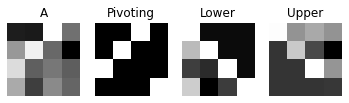

In [4]:
fig, axs = plt.subplots(1,4)
axs[0].imshow(A, cmap='gray')
axs[0].set_title('A')
axs[0].axis('off')
axs[1].imshow(P, cmap='gray')
axs[1].set_title('Pivoting')
axs[1].axis('off')
axs[2].imshow(L, cmap='gray')
axs[2].set_title('Lower')
axs[2].axis('off')
axs[3].imshow(U, cmap='gray')
axs[3].set_title('Upper')
axs[3].axis('off')
plt.show()

In [5]:
A = np.random.rand(256,128)
P, L, U = lu(A)
R = np.linalg.norm(P@A - L@U) # calculo el residuo
print('Residuo')
display(R)
# la factorizacion es suficientemente precisa
condicionamiento = np.linalg.cond(A)
display(condicionamiento)
np.allclose(A - P @ L @ U, np.zeros((256,128)))

Residuo


52.21858564686498

67.80671950737813

True

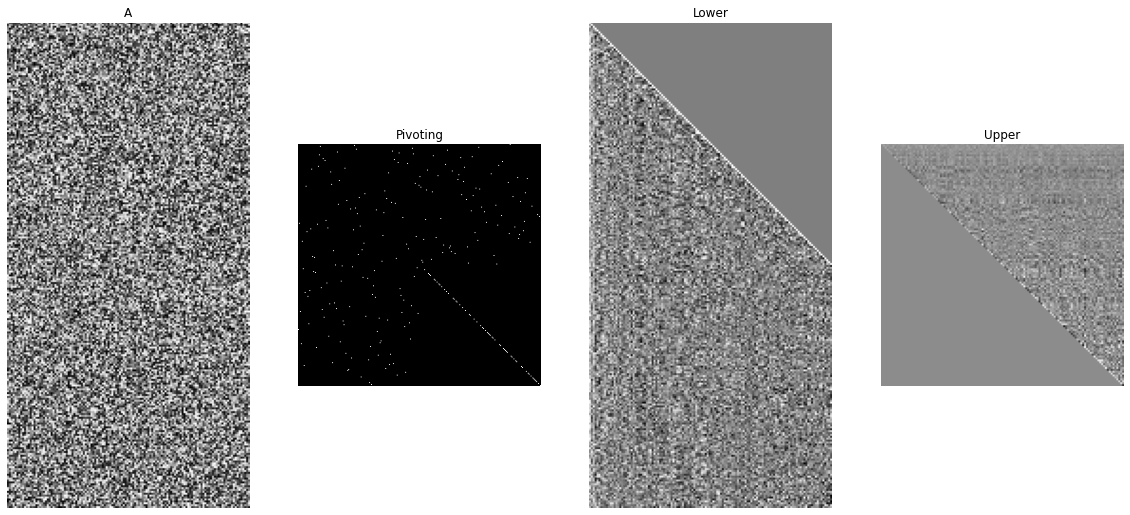

In [6]:
fig, axs = plt.subplots(1,4, figsize=(20,20))
axs[0].imshow(A, cmap='gray')
axs[0].set_title('A')
axs[0].axis('off')
axs[1].imshow(P, cmap='gray')
axs[1].set_title('Pivoting')
axs[1].axis('off')
axs[2].imshow(L, cmap='gray')
axs[2].set_title('Lower')
axs[2].axis('off')
axs[3].imshow(U, cmap='gray')
axs[3].set_title('Upper')
axs[3].axis('off')
plt.show()

## Ejemplo 6.1 Factorizacion LU: aplicacion del algoritmo paso a paso

In [7]:
A= np.array([[1,  -1,  2],  
             [2,   3,  3],
             [0,   2,  5]])
# veamos que A es no singular
d = np.linalg.det(A)
display(d)

# multiplicadores primera etapa
l_21 = A[1,0]/A[0,0]
l_31 = A[2,0]/A[0,0]

M_1= np.array([[1,    0, 0],
              [-l_21, 1, 0],
              [-l_31, 0, 1]]) 
A_1=M_1@A
display(A_1)

# multiplicadores segunda etapa
l_32 = A_1[2,1]/A_1[1,1]
M_2= np.array([[1,     0, 0],
               [0,     1, 0],
               [0, -l_32, 1]]) 

A_2=M_2@A_1
display(A_2)

# matriz triangular superior
U = A_2
L = np.array([[1,       0, 0],
              [l_21,    1, 0],
              [l_31, l_32, 1]])

print('U')
display(U)
print('L')
display(L)

L1 = np.linalg.inv(M_2@M_1)

# verifica
residuo = L@U - A
print('Residuo')
display(residuo)
np.allclose(L@U - A, np.zeros((3,3)))

# con Scipy
P, L, U = lu(A)

print('U Scipy')
display(U)
print('L Scipy')
display(L)

# observa que matlab ha hecho pivoteo para garantizar la factorizacion

27.0

array([[ 1., -1.,  2.],
       [ 0.,  5., -1.],
       [ 0.,  2.,  5.]])

array([[ 1. , -1. ,  2. ],
       [ 0. ,  5. , -1. ],
       [ 0. ,  0. ,  5.4]])

U


array([[ 1. , -1. ,  2. ],
       [ 0. ,  5. , -1. ],
       [ 0. ,  0. ,  5.4]])

L


array([[1. , 0. , 0. ],
       [2. , 1. , 0. ],
       [0. , 0.4, 1. ]])

Residuo


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

U Scipy


array([[ 2. ,  3. ,  3. ],
       [ 0. , -2.5,  0.5],
       [ 0. ,  0. ,  5.4]])

L Scipy


array([[ 1. ,  0. ,  0. ],
       [ 0.5,  1. ,  0. ],
       [ 0. , -0.8,  1. ]])

## Ejercicio 6.1 el pivoteo es necesario

In [8]:
A = np.array([[1,   1,  3],
              [2,   2,  2],
              [3,   6,  4]])

# veamos que A es no singular
d = np.linalg.det(A)
display(d)


# multiplicadores primera etapa
l_21 = A[1,0]/A[0,0]
l_31 = A[2,0]/A[0,0]

M_1= np.array([[1,    0, 0],
              [-l_21, 1, 0],
              [-l_31, 0, 1]]) 
A_1=M_1@A
display(A_1)

12.0

array([[ 1.,  1.,  3.],
       [ 0.,  0., -4.],
       [ 0.,  3., -5.]])

In [9]:
# multiplicadores segunda etapa: "explota el multiplicador".
l_32 = A_1[2,1]/A_1[1,1]
M_2= np.array([[1,     0, 0],
               [0,     1, 0],
               [0, -l_32, 1]]) 

A_2=M_2@A_1
display(A_2)

/tmp/ipykernel_32791/3404368612.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  l_32 = A_1[2,1]/A_1[1,1]
/tmp/ipykernel_32791/3404368612.py:7: RuntimeWarning: invalid value encountered in matmul
  A_2=M_2@A_1


array([[ 1.,  1.,  3.],
       [ 0.,  0., -4.],
       [nan, nan, inf]])

In [10]:
# matriz triangular superior
U = A_2
L = np.array([[1,       0, 0],
              [l_21,    1, 0],
              [l_31, l_32, 1]])

print('U')
display(U)
print('L')
display(L)

L1 = np.linalg.inv(M_2@M_1)

# verifica
residuo = L@U - A
print('Residuo')
display(residuo)

# con Scipy
P, L, U = lu(A)

print('U Scipy')
display(U)
print('L Scipy')
display(L)

# observa que Scipy ha hecho pivoteo para garantizar la factorizacion

U


array([[ 1.,  1.,  3.],
       [ 0.,  0., -4.],
       [nan, nan, inf]])

L


array([[ 1.,  0.,  0.],
       [ 2.,  1.,  0.],
       [ 3., inf,  1.]])

Residuo


/tmp/ipykernel_32791/733677712.py:12: RuntimeWarning: invalid value encountered in matmul
  L1 = np.linalg.inv(M_2@M_1)
/tmp/ipykernel_32791/733677712.py:15: RuntimeWarning: invalid value encountered in matmul
  residuo = L@U - A


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

U Scipy


array([[ 3.        ,  6.        ,  4.        ],
       [ 0.        , -2.        , -0.66666667],
       [ 0.        ,  0.        ,  2.        ]])

L Scipy


array([[1.        , 0.        , 0.        ],
       [0.66666667, 1.        , 0.        ],
       [0.33333333, 0.5       , 1.        ]])

## Ejercicio 6.2
Aplicacion: Descomposicion LU de una imagen
* LU de barbara en gris

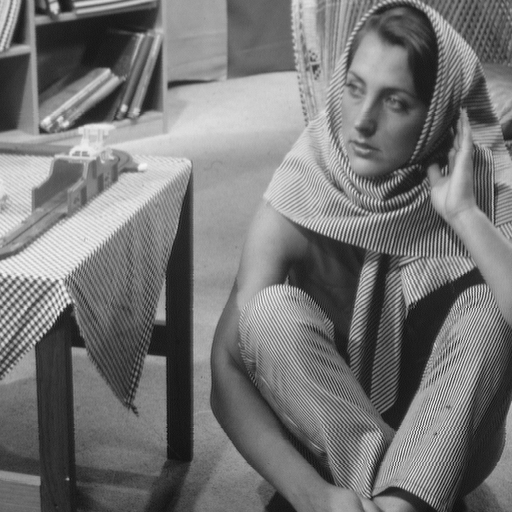

In [11]:
from PIL import Image
f1 = Image.open('Images/barbara.png')
display(f1)
f1 = np.asarray(f1) # pasamos a numpy

In [12]:
P, L, U = lu(f1)
R = np.linalg.norm(P@f1 - L@U) # calculo el residuo
print('Residuo')
display(R)
# la factorizacion es suficientemente precisa
condicionamiento = np.linalg.cond(A)
display(condicionamiento)
np.allclose(f1 - P @ L @ U, np.zeros_like(f1))


Residuo


38114.583560626765

12.34517492115627

True

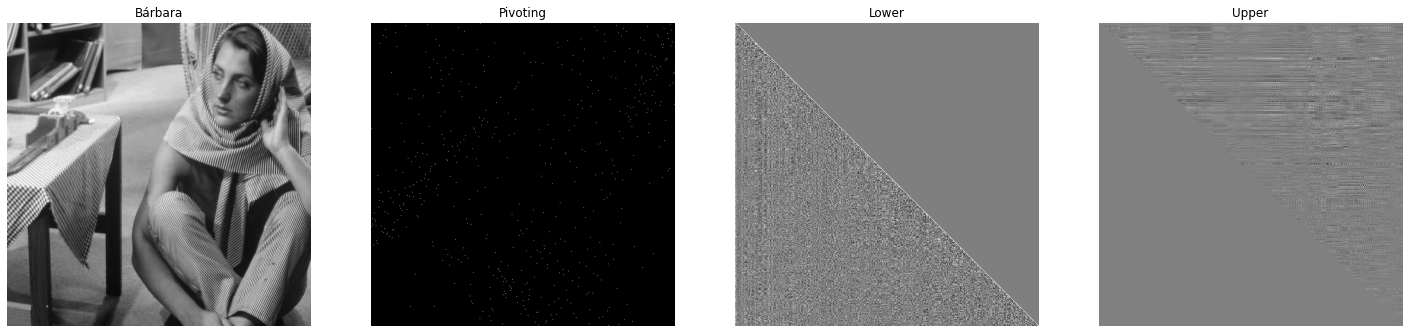

In [13]:
fig, axs = plt.subplots(1,4, figsize=(25,25))
axs[0].imshow(f1, cmap='gray')
axs[0].set_title('Bárbara')
axs[0].axis('off')
axs[1].imshow(P, cmap='gray')
axs[1].set_title('Pivoting')
axs[1].axis('off')
axs[2].imshow(L, cmap='gray')
axs[2].set_title('Lower')
axs[2].axis('off')
axs[3].imshow(U, cmap='gray')
axs[3].set_title('Upper')
axs[3].axis('off')
plt.show()

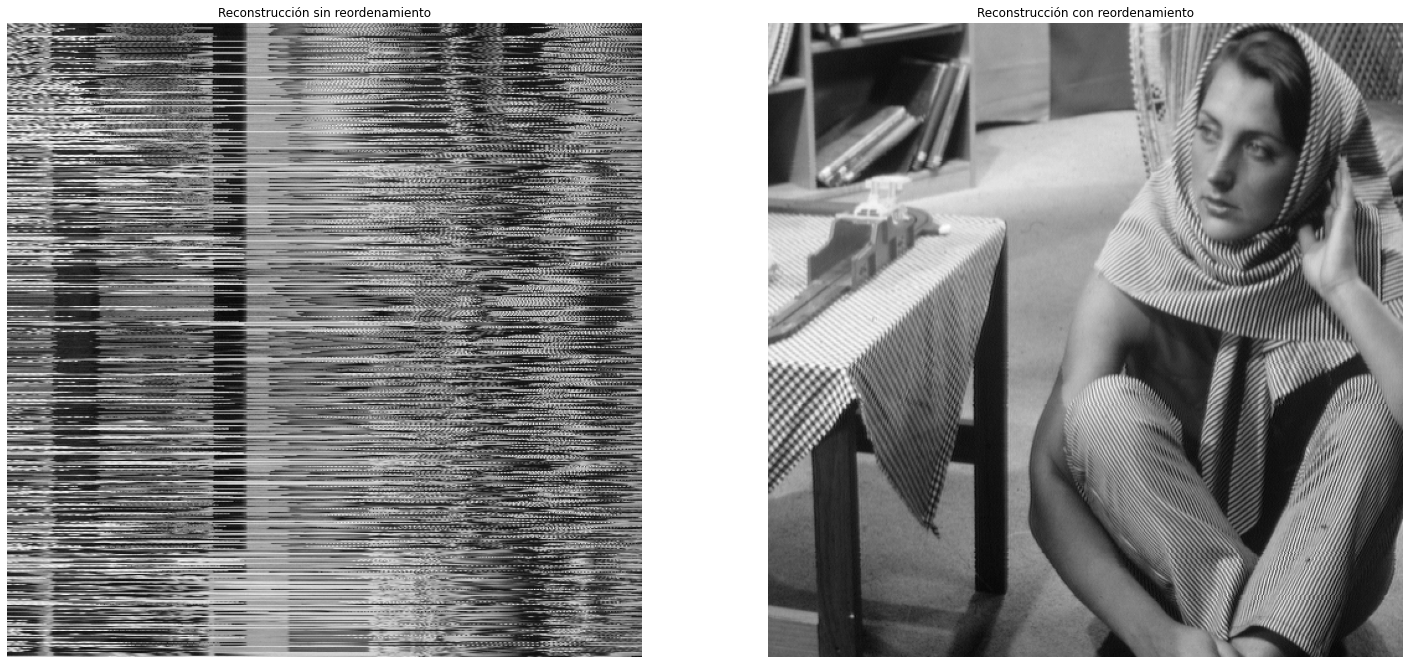

In [14]:
fig, axs = plt.subplots(1,2, figsize=(25,25))
axs[0].imshow(L @ U, cmap='gray')
axs[0].set_title('Reconstrucción sin reordenamiento')
axs[0].axis('off')
axs[1].imshow(P @ L @ U, cmap='gray')
axs[1].set_title('Reconstrucción con reordenamiento')
axs[1].axis('off')
plt.show()

# 6.2 Metodos Iterativos

## Ejercicio 6.3 Metodo de Jacobi

In [15]:
A = np.array([ [ 2, 0, 1, 1],
               [-2, 4, 0, 1],
               [-1,-1, 3, 1],
               [ 0, 3,-1, 4]])
# A diag dominante
sol = np.ones((4,1)) # solución exacta
b = A@sol # calculo el dato necesario para obtenerla.
D = np.diag(np.diag(A)) # Calculo el Precondicionador del Metodo de Jacobi

In [16]:
# condiciones necesarias
determinante = np.linalg.det(A) # existe unica solucion
print('Determinante')
display(determinante)

print('Diagonal') #no hay elementos nulos en la diagonal
display(D)
# condicion necesaria y suficiente
B = np.linalg.inv(D)@(D-A) # matriz de iteracion
print('Matrix de Iteración')
display(B)

espectro = np.linalg.eig(B)[0] #autovalores
display(espectro)
print('Condicion necesaria y suficiente de convergencia')
radio= np.max(np.abs(espectro)) # hay convergencia
print('radio')
display(radio)

Determinante


103.00000000000001

Diagonal


array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Matrix de Iteración


array([[ 0.        ,  0.        , -0.5       , -0.5       ],
       [ 0.5       ,  0.        ,  0.        , -0.25      ],
       [ 0.33333333,  0.33333333,  0.        , -0.33333333],
       [ 0.        , -0.75      ,  0.25      ,  0.        ]])

array([-0.31570598+0.4048643j , -0.31570598-0.4048643j ,
        0.31570598+0.31293039j,  0.31570598-0.31293039j])

Condicion necesaria y suficiente de convergencia
radio


0.5134056533149319

Resolución Jacobi

In [17]:
from utils.itermeth import itermeth

itermax=100
tol=1e-12
x0 = np.zeros((4,1)) # rand(4,1)

tic = time.time()
x_J, iter_j = itermeth(A, b, x0, itermax, tol, 'J') # Metodo de Jacobi
toc = time.time()

tiempo_jacobi=toc - tic
print('Tiempo Jacobi')
display(tiempo_jacobi)

print('Iteraciones metodo de Jacobi')
display(iter_j)

print('Error cometido metodo de Jacobi')
e_J = np.linalg.norm(sol-x_J) #/norm(sol)
display(e_J)

Tiempo Jacobi


0.0031023025512695312

Iteraciones metodo de Jacobi


42

Error cometido metodo de Jacobi


1.408536380981976e-12

Comparacion metodo directo

In [18]:
tic = time.time()
x_s= np.linalg.pinv(A)@b
tiempo_pinv= time.time() - tic
print('Tiempo Pinv')
display(tiempo_pinv)

print('Error cometido con pinv')
e_p = np.linalg.norm(sol-x_s) #
display(e_p)

Tiempo Pinv


0.0002353191375732422

Error cometido con pinv


8.005932084973442e-16

### Metodo de Jacobi para Matriz aleatoria simetrica


In [19]:
m, n = 100, 100
A = np.random.rand(m,n)

A = A.T@A + 0.001*np.eye(m)# A simetrica 

E = np.linalg.eig(A)[0]

H = np.linalg.cholesky(A) # A definida positiva (verifica A-H'*H=0)

P = np.diag(np.diag(A)) # precondicionador

### Aplicacion teorema 6.2 Veo Jacobi como Richardson Estacionario


In [20]:
espectro = np.linalg.eig(np.linalg.inv(P)@A)[0] #autovalores

cota_alpha = 2/np.max(espectro) # alpha=1 para jacobi. no converge
print('cota alpha')
display(cota_alpha)
alpha_opt = 2/(np.max(espectro) + np.min(espectro))
print('alpha opt')
display(alpha_opt)

condicionamiento_A = np.linalg.cond(A)
print('Cond A')
display(condicionamiento_A)
condicionamiento_P = np.linalg.cond(P)
print('Cond P')
display(condicionamiento_P)


cota alpha


0.02649055145305982

alpha opt


0.02649052570265422

Cond A


1034988.905685651

Cond P


1.6132013076932614

Condicion necesaria y suficiente de convergencia

In [21]:
D = np.diag(np.diag(A)) # precondicionador
B = np.linalg.inv(D)@(D-A) # matriz de iteracion
espectro = np.linalg.eig(B)[0]

print('Condicion necesaria y suficiente de convergencia')
radio = np.max(np.abs(espectro))
print('radio')
display(radio)


Condicion necesaria y suficiente de convergencia
radio


74.49861706517964

Resolución Jacobi

In [22]:
sol = np.ones((n,1))
b = A@sol
itermax=100
tol=1e-12
x0 = np.random.rand(n,1) 

tic = time.time()
x_J, iter_j = itermeth(A, b, x0, itermax, tol, 'J') # Metodo de Jacobi
toc = time.time()

tiempo_jacobi=toc - tic
print('Tiempo Jacobi')
display(tiempo_jacobi)

print('Iteraciones metodo de Jacobi')
display(iter_j)

print('Error cometido metodo de Jacobi')
e_J = np.linalg.norm(sol-x_J) #/norm(sol)
display(e_J)

Tiempo Jacobi


0.11520671844482422

Iteraciones metodo de Jacobi


100

Error cometido metodo de Jacobi


inf

Comparación Método Directo

In [23]:
tic = time.time()
x_s= np.linalg.pinv(A)@b
tiempo_pinv= time.time() - tic
print('Tiempo Pinv')
display(tiempo_pinv)

print('Error cometido con pinv')
e_p = np.linalg.norm(sol-x_s) #
display(e_p)

Tiempo Pinv


0.0028705596923828125

Error cometido con pinv


4.5075258437369224e-10

## Ejercicio 6.4 quarteroni pg 171 5.11


In [24]:
alpha = symbols('alpha')
A = np.array([[alpha, 0, 1],
              [0, alpha, 0],
              [1, 0, alpha]])
A = Matrix(A) # pasamos a sympy
display(A)
deter_A = A.det()
display(deter_A)

D = sy.diag(*A.diagonal())
D

Matrix([
[alpha,     0,     1],
[    0, alpha,     0],
[    1,     0, alpha]])

alpha**3 - alpha

Matrix([
[alpha,     0,     0],
[    0, alpha,     0],
[    0,     0, alpha]])

In [25]:
P = D
B_J = P.inv()@(P - A)
espectro_J = B_J.eigenvals() # se deduce la condicion abs(alpha)>1
display(espectro_J)

{-1/alpha: 1, 1/alpha: 1, 0: 1}

In [26]:
# alpha = 2 jacobi convergente
A_j1 = A.subs(alpha,2)
display(A_j1)
D_j1 = sy.diag(*A_j1.diagonal())
display(D_j1)
P_j1 = D_j1
B_j1 = P_j1.inv()@(P_j1-A_j1)

espectro_j1 = np.linalg.eig(np.asarray(B_j1, np.float32))[0]
display(espectro_j1)
radio_j1 = np.max(np.abs(espectro_j1))
display(radio_j1)

Matrix([
[2, 0, 1],
[0, 2, 0],
[1, 0, 2]])

Matrix([
[2, 0, 0],
[0, 2, 0],
[0, 0, 2]])

array([ 0.5, -0.5,  0. ], dtype=float32)

0.5

In [27]:
# alpha = 0.5 jacobi divergente
A_j1 = A.subs(alpha, 0.5)
display(A_j1)
D_j1 = sy.diag(*A_j1.diagonal())
display(D_j1)
P_j1 = D_j1
B_j1 = P_j1.inv()@(P_j1-A_j1)

espectro_j1 = np.linalg.eig(np.asarray(B_j1, np.float32))[0]
display(espectro_j1)
radio_j1 = np.max(np.abs(espectro_j1))
display(radio_j1)

Matrix([
[0.5,   0,   1],
[  0, 0.5,   0],
[  1,   0, 0.5]])

Matrix([
[0.5,   0,   0],
[  0, 0.5,   0],
[  0,   0, 0.5]])

array([ 2., -2.,  0.], dtype=float32)

2.0

Matriz de iteracion Gauss-Seidel

In [28]:
E = -Matrix(np.tril(A, -1))
display(E)
P = D - E # precondicionador
display(P)
B_GS = P.inv()@(P-A) # matriz de iteracion
display(B_GS)
espectro_GS = B_GS.eigenvals()

Matrix([
[ 0, 0, 0],
[ 0, 0, 0],
[-1, 0, 0]])

Matrix([
[alpha,     0,     0],
[    0, alpha,     0],
[    1,     0, alpha]])

Matrix([
[0, 0,    -1/alpha],
[0, 0,           0],
[0, 0, alpha**(-2)]])

GS convergente $\alpha = 2$

In [29]:
A_gs1 = A.subs(alpha, 2)
E_gs1 = -Matrix(np.tril(A_gs1,-1))
D_gs1 = sy.diag(*A_gs1.diagonal())
P_gs1 = D_gs1-E_gs1;
B_gs1 = P_gs1.inv()@(P_gs1-A_gs1)
espectro_gs1 = np.linalg.eig(np.asarray(B_gs1,np.float32))[0]
radio_gs1 = np.max(np.abs(espectro_gs1))
print('radio gs1')
radio_gs1

radio gs1


0.25

GS divergente $\alpha = 1/2$

In [30]:
A_gs2 = A.subs(alpha, 1/2)
E_gs2 = -Matrix(np.tril(A_gs2,-1))
D_gs2 = sy.diag(*A_gs2.diagonal())
P_gs2 = D_gs2-E_gs2
B_gs2 = P_gs2.inv()@(P_gs2-A_gs2)
espectro_gs2 = np.linalg.eig(np.asarray(B_gs2,np.float32))[0]
radio_gs2 = np.max(np.abs(espectro_gs2))
print('radio gs2')
radio_gs2

radio gs2


4.0

## Ejercicio 6.5 EJERCICIOS pg 171 5.12

In [31]:
beta = symbols('beta')
A = np.array([[ -10, 2],
              [beta, 5]])
A = Matrix(A)

print('Determinante de A')
display(A.det())
D = sy.diag(*A.diagonal())
P = D
B_J = P.inv()@(P-A)
display(B_J)
espectro_J = B_J.eigenvals()
display(espectro_J) # se deduce la condicion abs(beta)<25. 


Determinante de A


-2*beta - 50

Matrix([
[      0, 1/5],
[-beta/5,   0]])

{-sqrt(-beta)/5: 1, sqrt(-beta)/5: 1}

Jacobi convergente $\beta = 2$

In [32]:
A_j1 = A.subs(beta, 2)
D_j1 = sy.diag(*A_j1.diagonal())
P_j1 = D_j1;
B_j1 = P_j1.inv()@(P_j1 - A_j1)
espectro_j1 = np.linalg.eig(np.asarray(B_j1, np.float32))[0]
radio_j1 = np.max(np.abs(espectro_j1))
print('radio j1')
radio_j1

radio j1


0.28284273

Jacobi divergente $\beta = 26$

In [33]:
A_j2 = A.subs(beta, 26)
D_j2 = sy.diag(*A_j2.diagonal())
P_j2 = D_j2
B_j2 = P_j2.inv()@(P_j2 - A_j2)
espectro_j2 = np.linalg.eig(np.asarray(B_j2, np.float32))[0]
radio_j2 = np.max(np.abs(espectro_j2))
print('radio j2')
radio_j2

radio j2


1.0198039

Matriz de iteracion Gauss-Seidel

In [34]:
E = -Matrix(np.tril(A, -1))
display(E)
P = D - E # precondicionador
display(P)
B_GS = P.inv()@(P-A) # matriz de iteracion
display(B_GS)
espectro_GS = B_GS.eigenvals()
espectro_GS

Matrix([
[    0, 0],
[-beta, 0]])

Matrix([
[ -10, 0],
[beta, 5]])

Matrix([
[0,      1/5],
[0, -beta/25]])

{0: 1, -beta/25: 1}

GS convergente $\beta = 21$

In [35]:
A_gs1 = A.subs(beta, 21)
E_gs1 = -Matrix(np.tril(A_gs1,-1))
D_gs1 = sy.diag(*A_gs1.diagonal())
P_gs1 = D_gs1-E_gs1;
B_gs1 = P_gs1.inv()@(P_gs1-A_gs1)
espectro_gs1 = np.linalg.eig(np.asarray(B_gs1,np.float32))[0]
radio_gs1 = np.max(np.abs(espectro_gs1))
print('radio gs1')
radio_gs1

radio gs1


0.84

GS divergente $\beta = 26$

In [36]:
A_gs2 = A.subs(beta, 26)
E_gs2 = -Matrix(np.tril(A_gs2,-1))
D_gs2 = sy.diag(*A_gs2.diagonal())
P_gs2 = D_gs2-E_gs2
B_gs2 = P_gs2.inv()@(P_gs2-A_gs2)
espectro_gs2 = np.linalg.eig(np.asarray(B_gs2,np.float32))[0]
radio_gs2 = np.max(np.abs(espectro_gs2))
print('radio gs2')
radio_gs2

radio gs2


1.04

## Ejercicio 6.6 Jacobi para simetrica definida positiva

In [37]:
A = np.array([[1,1,0],
              [1,6,2],
              [0,2,1]])
autovalores = np.linalg.eig(A)[0]
display(autovalores)

sol = np.ones((3,1))
b = A@sol

x0 =  np.zeros_like(sol)

# Condicion necesaria y suficiente de convergencia

D = np.diag(np.diag(A))
B = np.linalg.inv(D)@(D - A) # matriz de iteracion
espectro = np.linalg.eig(B)[0]
display(espectro)

# Condicion necesaria y suficiente de convergencia
radio = np.max(np.abs(espectro))
print('radio')
display(radio)


array([6.85410197, 1.        , 0.14589803])

array([-9.12870929e-01,  7.26415456e-17,  9.12870929e-01])

radio


0.912870929175277

Resolución Jacobi

In [38]:
itermax=10000
tol=1e-6

tic = time.time()
x_J, iter_j = itermeth(A, b, x0, itermax, tol, 'J') # Metodo de Jacobi
toc = time.time()

tiempo_jacobi=toc - tic
print('Tiempo Jacobi')
display(tiempo_jacobi)

print('Iteraciones metodo de Jacobi')
display(iter_j)

print('Error cometido metodo de Jacobi')
e_J = np.linalg.norm(sol-x_J) #/norm(sol)
display(e_J)

Tiempo Jacobi


0.01244807243347168

Iteraciones metodo de Jacobi


152

Error cometido metodo de Jacobi


1.6062173624022505e-06

Resolución Gauss-Seidel

In [39]:
itermax=10000
tol=1e-6

tic = time.time()
x_gs, iter_gs = itermeth(A, b, x0, itermax, tol, 'G') # Metodo de Gauss-Seidel
toc = time.time()

tiempo_gs=toc - tic
print('Tiempo Gauss-Seidel')
display(tiempo_gs)

print('Iteraciones metodo de Gauss-Seidel')
display(iter_gs)

print('Error cometido metodo de Gauss-Seidel')
e_gs = np.linalg.norm(sol-x_gs) #/norm(sol)
display(e_J)

Tiempo Gauss-Seidel


0.004516124725341797

Iteraciones metodo de Gauss-Seidel


54

Error cometido metodo de Gauss-Seidel


1.6062173624022505e-06

Resolución Directo

In [40]:
tic = time.time()
x_pinv= np.linalg.pinv(A)@b
tiempo_pinv= time.time() - tic
print('Tiempo Pinv')
display(tiempo_pinv)

print('Error cometido con pinv')
e_p = np.linalg.norm(sol-x_pinv) #
display(e_p)

Tiempo Pinv


0.00016069412231445312

Error cometido con pinv


5.17892563931115e-15

## Ejercicio 6.7 Comparacion Jacobi vs Gauss-Seidel sin y con relajacion

Se considera una matriz cuadrada tridiagonal no singular con elementos no nulos en la diagonal. El metodo de Gauss-Seidel es mas rapido.

In [41]:
n = 10

A = 3*np.eye(n) - 2*np.diag(np.ones(n-1), 1) - np.diag(np.ones(n-1), -1)
b = A*np.ones((n,1))

itermax=1000;
tol=1e-12;
x_0 = np.zeros((n,1)) # inicializo con ceros
x_0 = np.random.randn(n,1) # inicializo aleatorio

In [45]:
# Algoritmo Jacobi
x_J,iter_j=itermeth(A,b,x_0,itermax,tol,'J');
print('Iteraciones metodo de Jacobi')
display(iter_j)
# Algoritmo Gauss-Seidel
x_GS,iter_gs=itermeth(A,b,x_0,itermax,tol,'G');
print('Iteraciones metodo de Gauss-Seidel')
display(iter_gs)
# Algoritmo Gauss-Seidel con sub-relajacion
w= 1/2  # hago sub-relajacion que no es correcto ya que GS converge, y de hecho va mas lento. Poner w=1+1/2 para sobre-relajacion va mas rapido

x_GSR, iter_gssub_rel = itermeth(A,b,x_0,itermax,tol,'G',w)
print('Iteraciones metodo de Gauss-Seidel relajado')
display(iter_gssub_rel)

Iteraciones metodo de Jacobi


280

Iteraciones metodo de Gauss-Seidel


130

Iteraciones metodo de Gauss-Seidel relajado


273

In [59]:
# Matriz de iteración Jacobi
D = np.diag(np.diag(A)) 
P = D #precondicionador
B = np.linalg.inv(P)@(P - A) # matriz de iteracion
espectro_J = np.linalg.eig(B)[0]
radio = np.max(np.abs(espectro_J))
print('radio jacobi')
display(radio)

# Matriz de iteracion Gauss-Seidel
E = -np.tril(A,-1)
P = D - E # precondicionador
B = np.linalg.inv(P)@(P - A) # matriz de iteracion
espectro_GS = np.linalg.eig(B)[0]
radio = np.max(np.abs(espectro_GS))
print('radio gauss-seidel')
display(radio)

# Matriz de iteracion de sub-ralajacion Gauss-Seidel
w = 0.5 # 0<w<1  sobre-relajacion
E = -np.tril(A,-1)
P = (1/w)*D - E # precondicionador
B = np.linalg.inv(P)@(P - A) # matriz de iteracion
espectro_GS_w = np.linalg.eig(B)[0]
radio = np.max(np.abs(espectro_GS_w))
print('radio gauss-seidel relajado')
display(radio)

radio jacobi


0.9046186508582077

radio gauss-seidel


0.8183349034805257

radio gauss-seidel relajado


0.9380827028306659

### Representacion del espectro de Jacobi y Gauss-Seidel: todos los autovalores estan en la franja -1,1

In [51]:
espectro_J

{-sqrt(-beta)/5: 1, sqrt(-beta)/5: 1}

/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


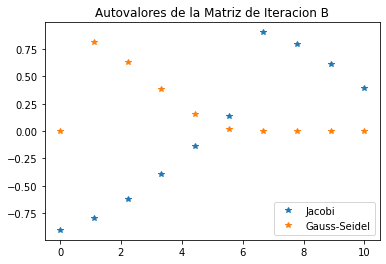

In [60]:

x = np.linspace(0,n,n) # defino el mallado, las abscisas

plt.plot(x,espectro_J,'*')
plt.plot(x,espectro_GS,'*')

plt.title('Autovalores de la Matriz de Iteracion B')
plt.legend(['Jacobi', 'Gauss-Seidel'])
plt.show()

/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


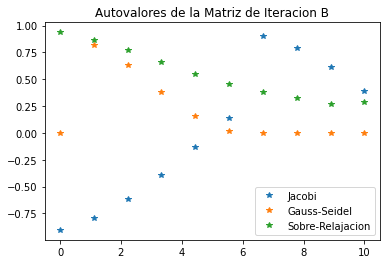

In [61]:
#Ejercicio: Representacion espectro Gauss-Seidel relajado
# Respuesta:

plt.plot(x,espectro_J,'*')
plt.plot(x,espectro_GS,'*')
plt.plot(x,espectro_GS_w,'*')

plt.title('Autovalores de la Matriz de Iteracion B')
plt.legend(['Jacobi', 'Gauss-Seidel', 'Sobre-Relajacion'])
plt.show()